In [40]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load )

city_df.head()

# Combine the data into a single dataset
ride_df = pd.merge(ride_df, city_df, how="outer", on="city")

group_city = ride_df.groupby(['city'])

average_fare = group_city["fare"].mean()
average_fare.head()

total_rides_per_city = group_city["ride_id"].nunique()
total_rides_per_city.head()

driver_count_per_city = group_city["driver_count"].sum()
total_rides_per_city.head()
ride_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

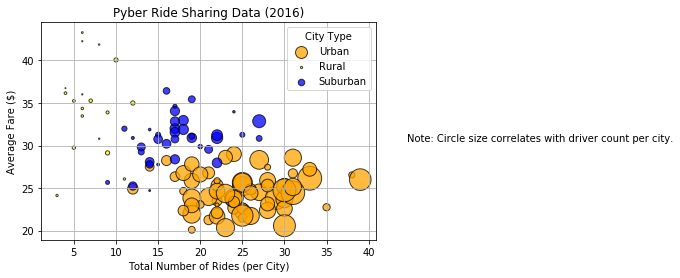

In [41]:
# is_urban calculation condition setting 
is_urban = ride_df['type']=='Urban'
is_urban

color_for_urban = 'orange'

# Create new DataFrame using condition settled before
is_urban_df = ride_df[is_urban]

# The analysis is groupby city
group_city_urban = is_urban_df.groupby(['city'])

# Calculating average_fare with mean() function
average_fare_urban = group_city_urban["fare"].mean()
average_fare_urban.head()

# Calculating total_rides_per_city with nunique() function
total_rides_per_city_urban = group_city_urban["ride_id"].nunique()
# total_rides_per_city_urban.head()

# Calculating driver_count_per_city with sum() function
driver_count_per_city_urban = group_city_urban["driver_count"].sum()
# driver_count_per_city_urban.head()



# is_rural calculation condition setting 
is_rural = ride_df['type']=='Rural'
is_rural

color_for_rural = 'yellow'

# Create new DataFrame using condition settled before
is_rural_df = ride_df[is_rural]
# print(is_rural_df.shape)
# print(is_rural_df['type'].value_counts())

# The analysis is groupby city
group_city_rural = is_rural_df.groupby(['city'])

# Calculating average_fare with mean() function
average_fare_rural = group_city_rural["fare"].mean()

# Calculating total_rides_per_city with nunique() function
total_rides_per_city_rural = group_city_rural["ride_id"].nunique()

# Calculating driver_count_per_city with sum() function
driver_count_per_city_rural = group_city_rural["driver_count"].sum()

# is_rural calculation condition setting 
is_suburban = ride_df['type']=='Suburban'
is_suburban

color_for_suburban = 'blue' 

# Create new DataFrame using condition settled before
is_suburban_df = ride_df[is_suburban]
# print(is_suburban_df.shape)
# print(is_suburban_df['type'].value_counts())

# The analysis is groupby city
group_city_suburban = is_suburban_df.groupby(['city'])

# Calculating average_fare with mean() function
average_fare_suburban = group_city_suburban["fare"].mean()

# Calculating total_rides_per_city with nunique() function
total_rides_per_city_suburban = group_city_suburban["ride_id"].nunique()

# Calculating driver_count_per_city with sum() function
driver_count_per_city_suburban = group_city_suburban["driver_count"].sum()

# Using plt.scatter to obtain 3 different data series on the same scatter plot
plt.scatter(total_rides_per_city_urban, average_fare_urban, s=driver_count_per_city_urban,c=color_for_urban
            , marker=".", facecolors=color_for_urban, edgecolors="black", alpha=0.75)
plt.scatter(total_rides_per_city_rural, average_fare_rural, s=driver_count_per_city_rural,c=color_for_rural
            , marker=".", facecolors=color_for_rural, edgecolors="black", alpha=0.75)
plt.scatter(total_rides_per_city_suburban, average_fare_suburban, s=driver_count_per_city_suburban,c=color_for_suburban
            , marker=".", facecolors=color_for_suburban, edgecolors="black", alpha=0.75)

# Rename x and y axis
plt.xlabel("Total Number of Rides (per City)")
plt.ylabel("Average Fare ($)")

# Rename Plot Title
plt.title('Pyber Ride Sharing Data (2016)')
plt.grid(True)

# Adding notes
plt.text(44.5, 30.5, r'Note: Circle size correlates with driver count per city.', fontsize=10)

# Setting plt legends
plt.legend(['Urban','Rural','Suburban'],title="City Type",markerscale=.7)
plt.show()


## Total Fares by City Type

In [42]:
# Calculate Type Percents
total_fares_sub = is_suburban_df['fare'].sum()
total_fares_urb = is_urban_df['fare'].sum()
total_fares_rural = is_rural_df['fare'].sum()
total_fares = total_fares_sub + total_fares_urb + total_fares_rural

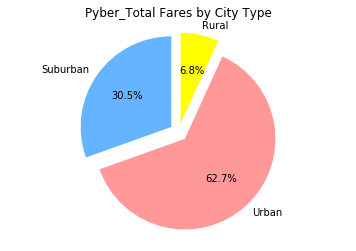

In [43]:
# Calculations
# print(total_fares_sub/total_fares)
# print(total_fares_urb/total_fares)
# print(total_fares_rural/total_fares)

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Suburban','Urban','Rural'
colors = '#66b3ff','#ff9999','#FFFF00'

# Setting pie parameters 
sizes = [total_fares_sub/total_fares, total_fares_urb/total_fares, total_fares_rural/total_fares]  

explode = (0.1, 0.1, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=False, startangle=90, colors=colors)

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Save Figure
plt.title('Pyber_Total Fares by City Type')
plt.savefig("../Images/Pyber_Total Fares by City Type.png")
plt.show()

## Total Rides by City Type

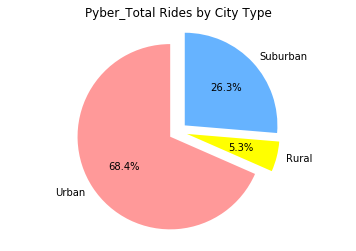

In [44]:
# Calculate Ride Percents
# print(len(is_urban_df)/len(ride_df))
# print(len(is_rural_df)/len(ride_df))
# print(len(is_suburban_df)/len(ride_df))

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Urban','Rural','Suburban'
colors = '#ff9999','#FFFF00','#66b3ff'

# Setting pie parameters 
sizes = [len(is_urban_df)/len(ride_df), len(is_rural_df)/len(ride_df), len(is_suburban_df)/len(ride_df)]  

explode = (0.1, 0.1, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=False, startangle=90, colors=colors)

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Save Figure
plt.title('Pyber_Total Rides by City Type')
plt.savefig("../Images/Pyber_Total Rides by City Type.png")
plt.show()

## Total Drivers by City Type

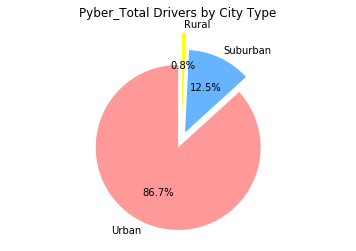

In [45]:
# Calculate Driver Percents
# is_rural_df['driver_count'].sum()
# print(is_rural_df['driver_count'].sum())
# print(is_suburban_df['driver_count'].sum())
# print(is_urban_df['driver_count'].sum())

# print((is_rural_df['driver_count'].sum()+is_suburban_df['driver_count'].sum()+is_urban_df['driver_count'].sum()))

# print(is_urban_df['driver_count'].sum()/(is_rural_df['driver_count'].sum()+is_suburban_df['driver_count'].sum()+is_urban_df['driver_count'].sum()))
# print(is_suburban_df['driver_count'].sum()/(is_rural_df['driver_count'].sum()+is_suburban_df['driver_count'].sum()+is_urban_df['driver_count'].sum()))
# print(is_rural_df['driver_count'].sum()/(is_rural_df['driver_count'].sum()+is_suburban_df['driver_count'].sum()+is_urban_df['driver_count'].sum()))

sum_1 = is_urban_df['driver_count'].sum()/(is_rural_df['driver_count'].sum()+is_suburban_df['driver_count'].sum()+is_urban_df['driver_count'].sum())
sum_2 = is_suburban_df['driver_count'].sum()/(is_rural_df['driver_count'].sum()+is_suburban_df['driver_count'].sum()+is_urban_df['driver_count'].sum())
sum_3 = is_rural_df['driver_count'].sum()/(is_rural_df['driver_count'].sum()+is_suburban_df['driver_count'].sum()+is_urban_df['driver_count'].sum())



# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Urban','Suburban','Rural'
colors = '#ff9999','#66b3ff','#FFFF00'

# Setting pie parameters 
sizes = [sum_1, sum_2, sum_3]  

explode = (0.1, 0.1, 0.3)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=False, startangle=90, colors=colors)

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Save Figure
plt.title('Pyber_Total Drivers by City Type')
plt.savefig("../Images/Pyber_Total Drivers by City Type.png")
plt.show()